In [1]:
%load_ext autoreload 
%autoreload 2

In [15]:
%matplotlib inline

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from regression import OLS
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
z = np.array([1, 2, 1])

# test polynomial fit for simple data
franke_sampled = OLS(x, y, z, 1)
franke_sampled.var_beta

array([8.22794963e-29, 6.81994701e-28, 2.03245775e-30, 1.27203821e-29])

## Plot Franke Function with noise

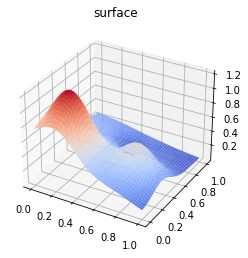

In [30]:
from franke_function import FrankeFunction as Fr
from matplotlib import cm

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

x, y = np.meshgrid(x, y)

noise = np.random.randn(x.shape[0], y.shape[1])

z = Fr(x, y) + noise*0

ax = plt.subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap=cm.coolwarm)
ax.set_title('surface');

## Comparing b_0 with subtracted mean 

In [21]:
from franke_function import FrankeFunction as Fr
from regression import OLS
from sklearn.preprocessing import StandardScaler

polynomial_deg = 2

x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
x, y = np.meshgrid(x, y)

noise = np.random.randn(x.shape[0], x.shape[1])
z = Fr(x, y) + noise*0.01

sol = OLS(x.ravel(), y.ravel(), z.ravel(), polynomial_deg)
print("Beta with no scaling: ", sol.beta_OLS)

x_cen = (x - np.mean(x))/np.std(x)
y_cen = (y - np.mean(y))/np.std(y)
sol = OLS(x_cen.ravel(), y_cen.ravel(), z.ravel(), polynomial_deg)
print("Beta with standardized x and y: ", sol.beta_OLS)


z_cen = (z - np.mean(z))/np.std(z)
sol_cen = OLS(x_cen.ravel(), y_cen.ravel(), z_cen.ravel(), polynomial_deg)
print("Beta with standardized x, y and z: ", sol_cen.beta_OLS)

scaler = StandardScaler() 

x_cen = scaler.fit_transform(x.reshape(-1, 1))
y_cen = scaler.fit_transform(y.reshape(-1, 1))
z_cen = scaler.fit_transform(z.reshape(-1, 1))

sol_cen = OLS(x_cen.ravel(), y_cen.ravel(), z_cen.ravel(), polynomial_deg)
print("Comparing with SK-Learn: ", sol_cen.beta_OLS)
# Interesting notes: 
# for a polynomial of degree 1 subtracting the mean causes beta[0] to approach zero. 

Beta with no scaling:  [[ 1.26751255]
 [-1.11746422]
 [-0.07318367]
 [-1.43735023]
 [ 2.05320843]
 [ 0.29974906]
 [ 0.38081322]
 [-1.55467929]
 [ 0.09051496]]
Beta with standardized x and y:  [[ 0.42910572]
 [-0.10986705]
 [ 0.0082932 ]
 [-0.20507958]
 [ 0.07421438]
 [ 0.0094165 ]
 [-0.03122052]
 [-0.03532815]
 [ 0.0006311 ]]
Beta with standardized x, y and z:  [[ 0.07755904]
 [-0.38218063]
 [ 0.02884852]
 [-0.7133844 ]
 [ 0.25816017]
 [ 0.03275599]
 [-0.10860287]
 [-0.12289155]
 [ 0.00219531]]
Comparing with SK-Learn:  [[ 0.07755904]
 [-0.38218063]
 [ 0.02884852]
 [-0.7133844 ]
 [ 0.25816017]
 [ 0.03275599]
 [-0.10860287]
 [-0.12289155]
 [ 0.00219531]]


# Predicting Frankes function

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from franke_function import FrankeFunction as Fr
from regression import OLS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = np.linspace(0, 1, 500)
y = np.linspace(0, 1, 500)
x, y = np.meshgrid(x, y)

noise = np.random.randn(x.shape[0], x.shape[1])
#z_real = Fr(x, y)
z = Fr(x, y) + noise*4
    
scaler = StandardScaler() 
x_cent = scaler.fit_transform(x.reshape(-1, 1))
y_cent = scaler.fit_transform(y.reshape(-1, 1))
z_cent = scaler.fit_transform(z.reshape(-1, 1))

xy_cent_train, xy_cent_test, z_cent_train, z_cent_test = train_test_split(np.hstack([x_cent, y_cent]), z_cent)
    
MSE = []
variance_beta = []
betas = []
for poly_deg in range(1, 6):
    print("Polynomial order: " + str(poly_deg))
    model = OLS(xy_cent_train[:, 0].ravel(), xy_cent_train[:, 1].ravel(), z_cent_train.ravel(), poly_deg)
    
    z_prediction = model.predict(xy_cent_test[:, 0], xy_cent_test[:, 1])
    MSE.append(model.MSE(xy_cent_test[:, 0], xy_cent_test[:, 1], z_cent_test))
    variance_beta.append(model.var_beta(xy_cent_test[:, 0], xy_cent_test[:, 1], z_cent_test))
    betas.append(model.beta_OLS)
print("Finish! ")
        
# Observasjonar: Det virker som at polynomene mine treffer ganske bra på franke-funksjonen. 
# Med introduksjon av støy øker bias-variance tradeoff. 
# Kva skjer om eg ikkje sentrerer data? 

# Sentrerer fordi: Det er ikkje relevant om eg sjekker data i området [0, 1] eller [11, 12]. Sentrering gjer at data
# måles opp mot sin egen spredning, ikkje korvidt det ligg langt unna origio. Polynomer er sensitive for om data er 
# under eller over origo. 

# Skalerer fordi: Det er ikkje relevant om z-verdiane ligg i [0 100] eller [200 1000]. Ved å dele på standardavviket
# får vi data der 2 betyr to ganger større enn standardavviket. Det er mer intuitivt og gjer det lettere å forstå 
# data ved bare å å kaste et blikk på det. 

# Trur også det fører til at beta sentreres rundt 0! 

Polynomial order: 1
Polynomial order: 2
Polynomial order: 3
Polynomial order: 4
Polynomial order: 5
Finish! 


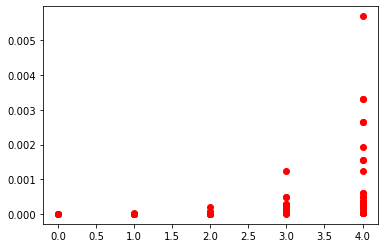

In [24]:
ax = plt.subplot(111)
for i in range(len(variance_beta)):
    for j in range(len(variance_beta[i])):
        ax.plot(i, variance_beta[i][j], 'ro')


In [25]:
%matplotlib inline

'\nKule funn:\nVi antar (som rimelig er med normalfordelt støy...) at variansen til beta er normalfordelt. \nEg tolker dette som at ulike rader gir ulike estimat på beta. \n'

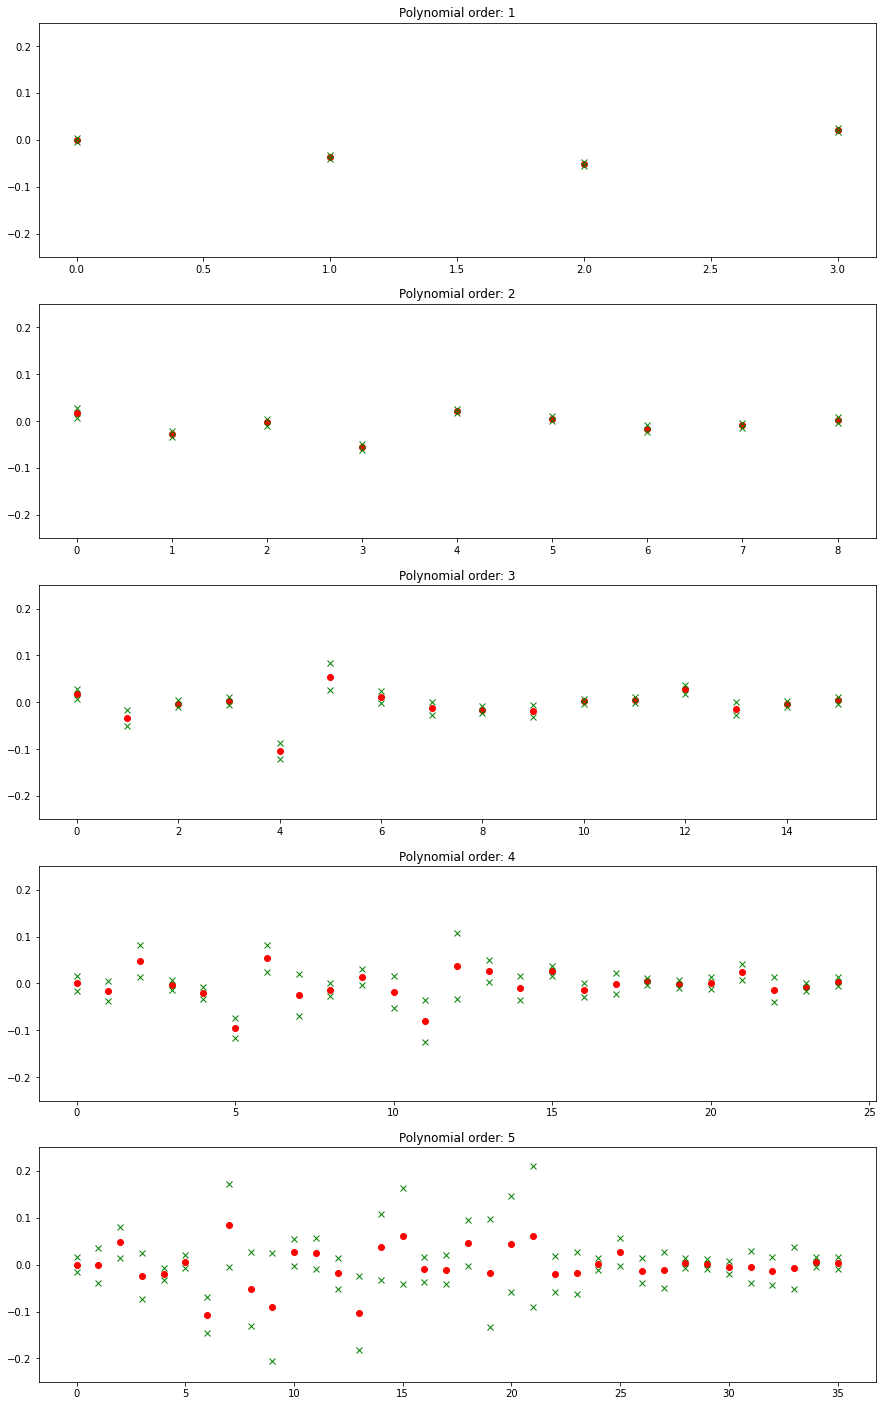

In [28]:
import matplotlib.pyplot as plt
n_polynom = len(MSE)

fig, axs = plt.subplots(n_polynom, 1, figsize=(15, 25), facecolor='w', edgecolor='k')
axs = axs.ravel()

sigma = 2
for polynom_nr in range(n_polynom):
    for beta_i in range(len(betas[polynom_nr])):
        axs[polynom_nr].plot(beta_i, betas[polynom_nr][beta_i], 'ro') #plot middle beta
        axs[polynom_nr].plot(beta_i, betas[polynom_nr][beta_i] + sigma*np.sqrt(variance_beta[polynom_nr][beta_i]), 'gx') 
        axs[polynom_nr].plot(beta_i, betas[polynom_nr][beta_i] - sigma*np.sqrt(variance_beta[polynom_nr][beta_i]), 'gx') 
    axs[polynom_nr].set_title('Polynomial order: ' + str(polynom_nr + 1))
    axs[polynom_nr].set_ylim([-0.25, 0.25])
    
"""
Kule funn:
Vi antar (som rimelig er med normalfordelt støy...) at variansen til beta er normalfordelt. 
Eg tolker dette som at ulike rader gir ulike estimat på beta. 

Er ulike konfidensintervall relatert til den faktiske funksjonen me prøver å sjå på?
At den endrer seg meir i y-retning enn i x-retning?
"""

In [22]:
np.std(z_cent_test)

0.9962696431628525

In [137]:
# Uten sentrering av data!




from franke_function import FrankeFunction as Fr
from regression import OLS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = np.linspace(0, 1, 500)
y = np.linspace(0, 1, 500)
x, y = np.meshgrid(x, y)

noise = np.random.randn(x.shape[0], x.shape[1])
#z_real = Fr(x, y)
MSE_list = []
for noise_degree in [0, 1.5, 3]:
    z = Fr(x, y) + noise*noise_degree
   
    x_cent = x.reshape(-1, 1)
    y_cent = y.reshape(-1, 1)
    z_cent = z.reshape(-1, 1)

    xy_cent_train, xy_cent_test, z_cent_train, z_cent_test = train_test_split(np.hstack([x_cent, y_cent]), z_cent)
    
    MSE = []
    for poly_deg in range(1, 15):
        print("Polynomial degree: ", poly_deg)
        model = OLS(xy_cent_train[:, 0].ravel(), xy_cent_train[:, 1].ravel(), z_cent_train.ravel(), poly_deg)
        z_prediction = model.predict(xy_cent_test[:, 0], xy_cent_test[:, 1])
        MSE.append(np.sum((z_prediction - z_cent_test)**2))
    MSE_list.append(MSE)

# Observasjonar: Det virker som at polynomene mine treffer ganske bra på franke-funksjonen. 
# Med introduksjon av støy øker bias-variance tradeoff. DEt gir meining da støy gir varians. 

Polynomial degree:  1
Polynomial degree:  2
Polynomial degree:  3
Polynomial degree:  4
Polynomial degree:  5
Polynomial degree:  6
Polynomial degree:  7
Polynomial degree:  8
Polynomial degree:  9
Polynomial degree:  10
Polynomial degree:  11
Polynomial degree:  12
Polynomial degree:  13
Polynomial degree:  14
Polynomial degree:  1
Polynomial degree:  2
Polynomial degree:  3
Polynomial degree:  4
Polynomial degree:  5
Polynomial degree:  6
Polynomial degree:  7
Polynomial degree:  8
Polynomial degree:  9
Polynomial degree:  10
Polynomial degree:  11
Polynomial degree:  12
Polynomial degree:  13
Polynomial degree:  14
Polynomial degree:  1
Polynomial degree:  2
Polynomial degree:  3
Polynomial degree:  4
Polynomial degree:  5
Polynomial degree:  6
Polynomial degree:  7
Polynomial degree:  8
Polynomial degree:  9
Polynomial degree:  10
Polynomial degree:  11
Polynomial degree:  12
Polynomial degree:  13
Polynomial degree:  14


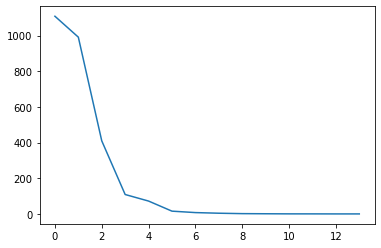

In [139]:
plt.plot(MSE_list[-1]) # sjekk også ut 0
plt.show()

# Reasons for normalizing data

- We do not expect data to be much dependent on 